## El 2805 Lab 1
By: David Rommedahl, Ning Wang

## Problem 1a:

To model the problem as an MDP we can consider the maze.py code that was used for Lab 0, modifying it to accomodate for the case of the added minotaur.
After modifying the actual maze so that it fits the new description we have to define the state space, action space, transition probabilities and the rewards.


#### State Space
We consider the state space:

\begin{equation}
    \mathcal{S} = \left\{(i,j,m,n): \textrm{such that maze}[i,j]\neq 1 \textrm{ and the cell }(m,n) \textrm{ is any cell within the maze}\right\}.
\end{equation}

This way the indexes $(i,j)$ represent the player's position within the maze and $(m,n)$ represent the minotaur's position, and any combination of these positions within the maze that do not put the player inside of a wall are valid states. The size of the state space is greatly increased from the model of Lab 0, but the model is conceptually simple.

#### Action Space
The action space is the same as for Lab 0:

$$\mathcal{A} = \lbrace \textrm{up}, \textrm{ down}, \textrm{ left}, \textrm{ right}, \textrm{ stay} \rbrace.$$

#### Transition Probabilities
The transition probabilities is the part of this lab where the greatest modification had to be made to the model from Lab 0. The movements of the player are deterministic (if the player chooses to move left the player will move left with probability 1 as long as moving left is a legal move. If it is not a legal move the player will remain in the same position), but the minotaur performs a random walk with the only limitation being that it is not allowed to stay in the same place (it is not allowed to perform a $\textit{Snake}$-esque move of moving out of the maze on one side and reappearing on the other side of the maze either). As each state is defined as the position of the player $\textit{and}$ the position of the minotaur, the state transition probabilities will be random with a probability given by the possible next positions for the minotaur.

For example, if the player makes a legal move to the right and the minotaur is in a position where it is allowed to move in all four directions there are four possible next states for the action $\textit{move right}$, each with a transition probability of $\frac{1}{4}$.

   - If at state $s$ action $a$ does not lead to a wall the transition probability is $\mathbb{P}(s'\mid s, a)=\frac{1}{s_p}$, where $s_p$ is the number of possible next positions for the minotaur.
   - If at state $s$ action $a$ $\textit{does}$ lead to a wall the transition probability is $\mathbb{P}(s\mid s, a)=1$. This means that both the player and minotaur will stay in the same position. The fact that the minotaur does not move in this case does not matter for the implementation.
   - If the player has reached the end state or is eaten by the minotaur ($(i,j)=(m,n)$) the transition probability is $\mathbb{P}(s \mid s, a) = 1$.

#### Rewards

The objective is to find the exit of the maze while avoiding obstacles and not being eaten by the minotaur:

   - If the player walks into an obstacle or is eaten by the minotaur the player receives a reward of $r(s,a)=-100$
   - If the player reaches the end state they receive a reward of $r(s,a)=0$
   - If the player makes a legal move they receive a reward of $r(s,a)=-1$

Since the transition probabilities are random in this implementation the rewards are received after an action is taken, which is consistent with the course litterature.

## Problem 1b:

In problem 1b we are expected to compute a policy which maximizes the probability of exiting the maze using dynamic programming and to illustrate this policy. We have decided to do this by using the methods for simulating and plotting a scenario already implemented for Lab 0, with modifications made to suite our code. 

In [1]:
import maze as mz
import numpy as np
from IPython import display
from matplotlib import pyplot as plt

# Modified maze from lab0. Now corresponding to maze in lab1

maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
env = mz.Maze(maze)

In [2]:
#### Dynamic Programming

# Finite horizon
horizon = 20
method = "DynProg"

# Solve the MDP problem with dynamic programming
V, policy = mz.dynamic_programming(env, horizon)

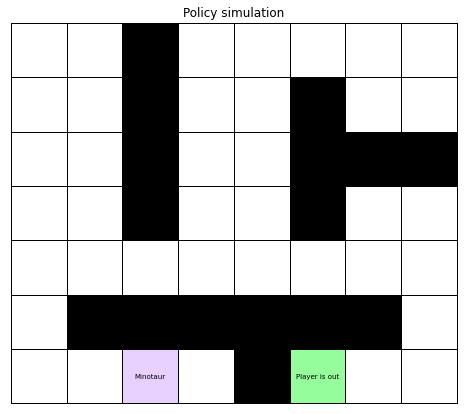

In [3]:


# Simulate the shortest path starting from position A
start = (0, 0, 6, 5)
path = env.simulate(start, policy, method)

# Show the shortest path
mz.animate_solution(maze, path)

## Problem 1c:

The next problem is to vary the time horizon, $T = 1,\dots,30$. For each $T$, a policy which maximizes the probability of exiting the maze should be found, and the probability should be plotted. Finally, the case when the minotaur is allowed to stand still should also be considered.

#### Minotaur cannot stand still

In [4]:
exit_probability_must_move = np.empty(30)

for horizon in range(1, 31):
    V, policy = mz.dynamic_programming(env, horizon)
    exit_probability_must_move[horizon-1] = mz.policy_evaluation(env, policy, horizon)

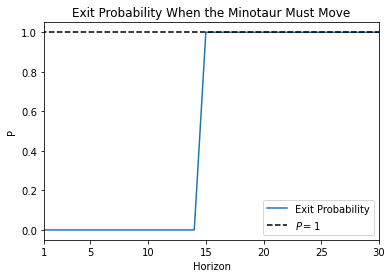

In [5]:
plt.plot(np.arange(1,31),exit_probability_must_move, label="Exit Probability")
plt.plot(np.ones(31), linestyle="--", color="k", label="$P=1$")
plt.legend()
plt.title("Exit Probability When the Minotaur Must Move")
plt.ylabel("P")
plt.xlabel("Horizon")
plt.xlim([1, 30])
plt.xticks([1, 5, 10, 15, 20, 25, 30])
plt.show()

#### Analysis
Clearly the player has found an optimal policy which garantees them to leave the maze in 15 timesteps.

#### The Minotaur is Allowed to Stand Still

In [6]:
env = mz.Maze(maze, stand_still=True)
exit_probability_stand_still = np.empty(30)

for horizon in range(1, 31):
    V, policy = mz.dynamic_programming(env, horizon)
    exit_probability_stand_still[horizon-1] = mz.policy_evaluation(env, policy, horizon)

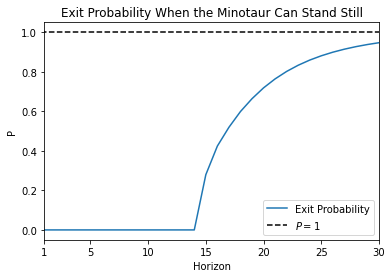

In [12]:
plt.plot(np.arange(1,31),exit_probability_stand_still, label="Exit Probability")
plt.plot(np.ones(31), linestyle="--", color="k", label="$P=1$")
plt.legend()
plt.title("Exit Probability When the Minotaur Can Stand Still")
plt.ylabel("P")
plt.xlabel("Horizon")
plt.xlim([1, 30])
plt.xticks([1, 5, 10, 15, 20, 25, 30])
plt.show()

#### Analysis
If the minotaur is allowed to stand still there are more considerations for the player to make when choosing their route, and they are less likely to exit the maze. We see that the probability grows towards 1 when the time horizon becomes longer, but there is always a risk that the player gets stuck. Below is a simulation of one of these scenarios, when the horizon is 30 and the minotaur is allowed to stand still.

In [ ]:
path = env.simulate(start, policy, method)

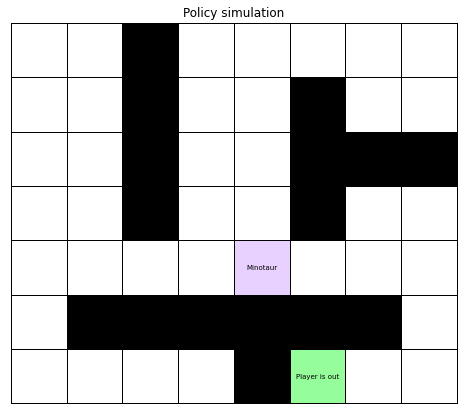

In [20]:
mz.animate_solution(maze, path)